In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Wave Height Prediction - Exploratory Analysis

## Overview
This notebook documents the R&D process before productionisation.

**Note:** Exploratory work was refactored into production scripts in `src/` for reproducibility and deployment. View the called functions in `src/` for details. 

# Simple Model with MLflow and Optuna

Simple model to predict significant wave height of one buoy based on another buoy's data.

- `optuna` was used to optimise hyperparameters.
- `mlflow` was used to document model optimisation details.

In [2]:
import logging
import warnings

from marine_ml.train import get_preprocessed_data, split_data

warnings.filterwarnings("ignore")

logging.basicConfig(level=logging.INFO)

logger = logging.getLogger("exploration")

/Users/s-northover-naylor/GitHub/marine-ml-pipeline/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load & Preprocess Data

- load the raw data
- perform some basic feature engineering
- split data for train/test

In [3]:
X, y = get_preprocessed_data()
X_train, X_test, y_train, y_test = split_data(X, y)

INFO:marine_ml.prepare_data:Loading preprocessed from cache.


## Train

- train model
- optimise hyperparameters

The model with optimised hyperparameters is saved as the main model in the MLflow UI. The models trialled during the hyperparameter tuning are visible as child runs in the MLflow UI.

INFO:marine_ml.helpers.optuna_helper:Hyperparameter optimsation with Optuna
Best trial: 0. Best value: 0.164946:   5%|▎      | 1/20 [00:00<00:16,  1.18it/s]

🏃 View run beautiful-skunk-723 at: http://localhost:5000/#/experiments/0/runs/d7541fe23a5349709a9f63464945fac0
🧪 View experiment at: http://localhost:5000/#/experiments/0


INFO:marine_ml.helpers.optuna_helper:Trial 1 achieved value: 0.1393277033587376 with  18.3872% improvement
Best trial: 1. Best value: 0.139328:  10%|▋      | 2/20 [00:01<00:15,  1.13it/s]

🏃 View run nervous-mouse-52 at: http://localhost:5000/#/experiments/0/runs/9be53f89dde84ca3868f187851820779
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 1. Best value: 0.139328:  15%|█      | 3/20 [00:02<00:16,  1.03it/s]

🏃 View run intrigued-rat-819 at: http://localhost:5000/#/experiments/0/runs/66981b16b94e4d74b4a616c1c96f050f
🧪 View experiment at: http://localhost:5000/#/experiments/0


INFO:marine_ml.helpers.optuna_helper:Trial 3 achieved value: 0.12115484743397988 with  14.9997% improvement
Best trial: 3. Best value: 0.121155:  20%|█▍     | 4/20 [00:04<00:16,  1.06s/it]

🏃 View run shivering-fish-205 at: http://localhost:5000/#/experiments/0/runs/53cdcff169354573ae8ea80ac84e52a5
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 3. Best value: 0.121155:  25%|█▊     | 5/20 [00:04<00:14,  1.05it/s]

🏃 View run rebellious-cub-650 at: http://localhost:5000/#/experiments/0/runs/68b52157551d4508bc6c06524b77d15a
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 3. Best value: 0.121155:  30%|██     | 6/20 [00:05<00:11,  1.22it/s]

🏃 View run carefree-wren-536 at: http://localhost:5000/#/experiments/0/runs/a46d89455a7645d18fd31cc85d2d59b6
🧪 View experiment at: http://localhost:5000/#/experiments/0


INFO:marine_ml.helpers.optuna_helper:Trial 6 achieved value: 0.10765028985386922 with  12.5448% improvement
Best trial: 6. Best value: 0.10765:  35%|██▊     | 7/20 [00:06<00:12,  1.00it/s]

🏃 View run loud-asp-729 at: http://localhost:5000/#/experiments/0/runs/bd15e1c6c7b54edc96d15bc4b8314097
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 6. Best value: 0.10765:  40%|███▏    | 8/20 [00:08<00:13,  1.12s/it]

🏃 View run capricious-toad-973 at: http://localhost:5000/#/experiments/0/runs/82f8c6d98e8343c7b35a4eae214e5731
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 6. Best value: 0.10765:  45%|███▌    | 9/20 [00:09<00:12,  1.12s/it]

🏃 View run exultant-croc-376 at: http://localhost:5000/#/experiments/0/runs/ac5533ee688f46cf8af088360b7d8d9b
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 6. Best value: 0.10765:  50%|███▌   | 10/20 [00:10<00:11,  1.15s/it]

🏃 View run unique-stoat-863 at: http://localhost:5000/#/experiments/0/runs/d7671eb7995b4e5e9fcf249a1b34ac82
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 6. Best value: 0.10765:  55%|███▊   | 11/20 [00:11<00:09,  1.09s/it]

🏃 View run exultant-gnu-861 at: http://localhost:5000/#/experiments/0/runs/088c5e4e5c024600ae6603577607ee35
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 6. Best value: 0.10765:  60%|████▏  | 12/20 [00:12<00:08,  1.05s/it]

🏃 View run ambitious-gnat-956 at: http://localhost:5000/#/experiments/0/runs/bea17c599e3646f4bd028bb37e330ed9
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 6. Best value: 0.10765:  65%|████▌  | 13/20 [00:13<00:07,  1.05s/it]

🏃 View run likeable-hound-269 at: http://localhost:5000/#/experiments/0/runs/9af37f02aa5140d8a8e12ef946606dd4
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 6. Best value: 0.10765:  70%|████▉  | 14/20 [00:14<00:06,  1.05s/it]

🏃 View run glamorous-elk-834 at: http://localhost:5000/#/experiments/0/runs/a51ed37d2df442448d7b0b74472001cc
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 6. Best value: 0.10765:  75%|█████▎ | 15/20 [00:14<00:04,  1.11it/s]

🏃 View run polite-kite-601 at: http://localhost:5000/#/experiments/0/runs/714dea09796241f4a051ca7baa1696cd
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 6. Best value: 0.10765:  80%|█████▌ | 16/20 [00:16<00:03,  1.06it/s]

🏃 View run funny-wolf-452 at: http://localhost:5000/#/experiments/0/runs/d5e2254b21214d4bbf182277fce1da1a
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 6. Best value: 0.10765:  85%|█████▉ | 17/20 [00:17<00:02,  1.00it/s]

🏃 View run suave-worm-297 at: http://localhost:5000/#/experiments/0/runs/9294877d465a4f4e81471c4901212785
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 6. Best value: 0.10765:  90%|██████▎| 18/20 [00:17<00:01,  1.07it/s]

🏃 View run fun-flea-327 at: http://localhost:5000/#/experiments/0/runs/52d51ace7d594622958e4484db6840f9
🧪 View experiment at: http://localhost:5000/#/experiments/0


Best trial: 6. Best value: 0.10765:  95%|██████▋| 19/20 [00:19<00:01,  1.08s/it]

🏃 View run handsome-pug-375 at: http://localhost:5000/#/experiments/0/runs/568d44bc221142ff9d96db83ebcae50e
🧪 View experiment at: http://localhost:5000/#/experiments/0


INFO:marine_ml.helpers.optuna_helper:Trial 19 achieved value: 0.1075064484014007 with  0.1338% improvement
Best trial: 19. Best value: 0.107506: 100%|█████| 20/20 [00:20<00:00,  1.03s/it]

🏃 View run awesome-quail-885 at: http://localhost:5000/#/experiments/0/runs/8842f5c6c4164dcd806b02b4b04d0ede
🧪 View experiment at: http://localhost:5000/#/experiments/0



INFO:marine_ml.helpers.optuna_helper:Evaluating model
2025/12/28 13:22:45 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
Registered model 'model-pz-to-lev' already exists. Creating a new version of this model...
2025/12/28 13:22:46 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: model-pz-to-lev, version 19
Created version '19' of model 'model-pz-to-lev'.
INFO:marine_ml.helpers.optuna_helper:Model registered as 'model-pz-to-lev' version 19
INFO:marine_ml.helpers.optuna_helper:Promoted to 'Production' stage.


🏃 View run pz_predict_lev_run at: http://localhost:5000/#/experiments/1/runs/4134429008264577806b55914cdb67af
🧪 View experiment at: http://localhost:5000/#/experiments/1


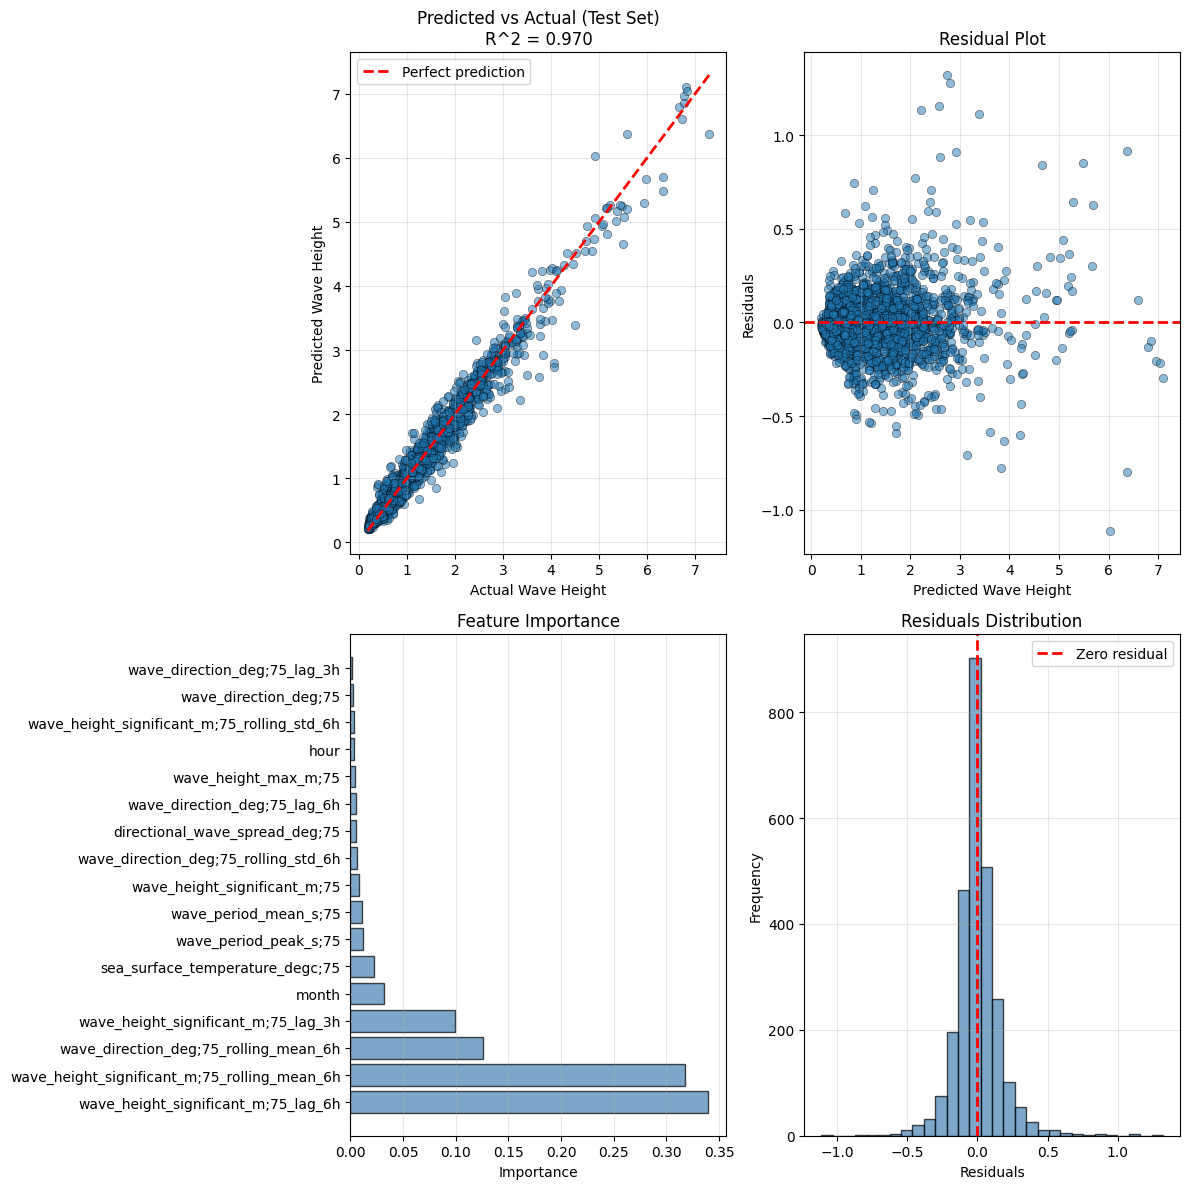

In [4]:
from marine_ml.helpers.optuna_helper import train_with_optuna_rf

model_uri = train_with_optuna_rf(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
)